<a href="https://colab.research.google.com/github/lsmanoel/pythonLearningAndDeepLearning/blob/master/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi... in this notes I will shown how to detect faces with different tools present in the Dlib and OpenCV packages. 
We will detect diferent faces and place a Bounding Box in each detected face. First we use Haar Cascade technique using only OpenCV package.

The Bounding Box in OpenCV is defined by a reference pixel coordinate (the left top pixel of Box) and the width e hight of the Bounding Box.

LEFT, TOP, WIDTH, HEIGHT.

With this four data we can draw a Bounding Box on the analized image that indicate the detected face.

The Haar Cascade technique consists of detecting the features Haar in the image. The exemple of Haar characteristics (the features Haar) is shown bellow:
![alt text](https://docs.opencv.org/3.0-beta/_images/haarfeatures.png)
Each type of pattern in the analyzed image tends to have a similar amount of features Haar. Soon this technique uses this similarity to identify patterns in the image.
The classification system is composed of a series cascade filter capturing characteristics. Similar to AND logic, for the image to be classified like ¨Detected Object¨, the different features Haar must be correlated with all filters (one filter to each features Haar): F1, F2, F3... 
![alt text](http://3.bp.blogspot.com/-EiP9XkuzQFU/Vft_kUVaTwI/AAAAAAAADxE/recSE2ctlRY/s1600/2.png).
These filters are trained with a dataset composed of positive and negative images. The positive images are the patterns that we wish detect and the negative images are the patterns which should not be detected.



Lets TRY... Save the image in your google driver and open this storage with code bellow.

![alt text](http://blogs.discovermagazine.com/neuroskeptic/files/2018/04/tom_cruise_lol.png)

Save this image in your google drive and mount this storage in colab Files workspace:

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

You may download the "haarcascade_frontalface_default.xml" from:
https://github.com/lsmanoel/pythonLearningAndDeepLearning/tree/master/DlibAndOpenCV-FaceDetection/resources

This data have the features Haar result of a training with images of frontal faces.

[[136  53 108 108]
 [ 17  53 115 115]
 [253  53 111 111]
 [482  54 112 112]
 [367  53 119 119]
 [135 279 111 111]
 [253 281 107 107]
 [366 273 119 119]
 [ 17 279 113 113]
 [495 308  89  89]]
Detected Faces:  10


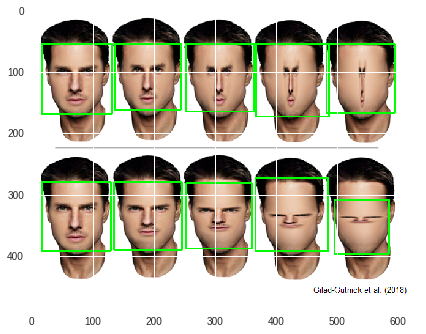

In [10]:
import cv2
from matplotlib import pyplot as plt

frame = cv2.imread("gdrive/My Drive/Colab Notebooks/face_detection/photos/tom_cruise_lol.png")
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

classifier= cv2.CascadeClassifier("gdrive/My Drive/Colab Notebooks/face_detection/resources/haarcascade_frontalface_default.xml")

grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detectedFaces = classifier.detectMultiScale(grayImage, scaleFactor=1.2, minSize=(50,50))

print(detectedFaces)
print("Detected Faces: ", len(detectedFaces))
for (x, y, l, a) in detectedFaces:
    cv2.rectangle(image, (x, y), (x + l, y + a), (0, 255, 0), 2)

plt.imshow(image)
plt.show()